In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./gyro_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movement  952 non-null    object
 1   x         952 non-null    int64 
 2   y         952 non-null    int64 
 3   z         952 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 29.9+ KB


In [4]:
df

,movement,x,y,z
0,foward,-893,222,1027
1,foward,-1322,-466,1378
2,foward,-455,1054,3
3,foward,-1195,-96,64
4,foward,-1397,-38,-175
...,...,...,...,...
947,stop,-106,-107,153
948,stop,-724,390,198
949,stop,-326,-48,9
950,stop,-1529,-323,-274


In [5]:
df_data = df.drop(['movement'], axis=1, inplace=False)
df_data

,x,y,z
0,-893,222,1027
1,-1322,-466,1378
2,-455,1054,3
3,-1195,-96,64
4,-1397,-38,-175
...,...,...,...
947,-106,-107,153
948,-724,390,198
949,-326,-48,9
950,-1529,-323,-274


In [6]:
df_target = df['movement']
df_target

0      foward
1      foward
2      foward
3      foward
4      foward
        ...  
947      stop
948      stop
949      stop
950      stop
951      stop
Name: movement, Length: 952, dtype: object

In [7]:
# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리

X_train , X_test , y_train , y_test = train_test_split(df_data, df_target,
                                                       test_size=0.2,  random_state=11)

# DecisionTreeClassifer 학습. 
dt_clf.fit(X_train , y_train)

DecisionTreeClassifier(random_state=156)

In [8]:
df_feature_names = df_data.columns

In [9]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함. 
export_graphviz(dt_clf, out_file="gyro.dot", class_names=['forward','backward','left','right','stop'] , feature_names = df_feature_names, impurity=True, filled=True)

In [10]:
#pip install pydotplus

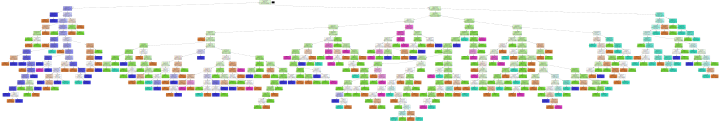

In [11]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("gyro.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

import pydotplus

pydot_graph = pydotplus.graph_from_dot_data(dot_graph)
pydot_graph.set_size('"10,90!"')
pydot_graph.write_png('resized_tree.png')
gvz_graph = graphviz.Source(pydot_graph.to_string())
gvz_graph

In [13]:
mask = ((df['movement']== 'left') | (df['movement']== 'right'))
df3 = df[mask]
df3

,movement,x,y,z
535,left,1643,332,6892
536,left,1263,941,7422
537,left,-832,-193,4584
538,left,-969,588,3472
539,left,-2652,-677,6251
...,...,...,...,...
840,right,-535,313,-5650
841,right,-471,486,-2015
842,right,1399,-287,-2769
843,right,-947,-608,-4240


In [14]:
df3_data = df3.drop(['movement'], axis=1, inplace=False)
df3_target = df3['movement']
df3_feature_names = df3_data.columns

In [15]:
# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리

X_train , X_test , y_train , y_test = train_test_split(df3_data, df3_target,
                                                       test_size=0.2,  random_state=11)

# DecisionTreeClassifer 학습. 
dt_clf.fit(X_train , y_train)

DecisionTreeClassifier(random_state=156)

In [16]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함. 
export_graphviz(dt_clf, out_file="gyro_LR.dot", class_names=['left','right'] , feature_names = df3_feature_names, impurity=True, filled=True)

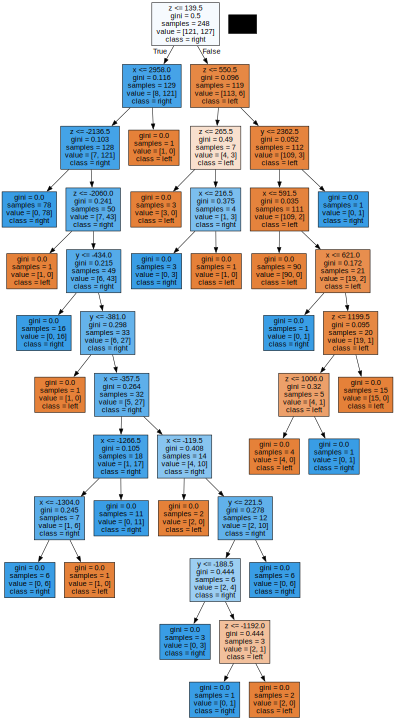

In [19]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("gyro_LR.dot", encoding='UTF8') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

#이미지 사이즈 조정
#!pip install pydotplus

import pydotplus

pydot_graph = pydotplus.graph_from_dot_data(dot_graph)
pydot_graph.set_size('"90,10!"')
pydot_graph.write_png('resized_tree.png')
gvz_graph = graphviz.Source(pydot_graph.to_string())
gvz_graph

In [31]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [2, 4, 6, 8 ,10, 12, 16 ,20, 24],
    'min_samples_split' : [8, 16, 24, 32],
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
GridSearchCV 최고 평균 정확도 수치: 0.9276
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 2, 'min_samples_split': 8}


In [32]:
from sklearn.metrics import accuracy_score

best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print('Desicion Tree 예측 정확도: {0:.4f}'.format(accuracy))

Desicion Tree 예측 정확도: 0.9355


In [22]:
# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156, max_depth=2, min_samples_split=8)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리

X_train , X_test , y_train , y_test = train_test_split(df3_data, df3_target,
                                                       test_size=0.2,  random_state=11)

# DecisionTreeClassifer 학습. 
dt_clf.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=2, min_samples_split=8, random_state=156)

In [23]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함. 
export_graphviz(dt_clf, out_file="gyro_LR2.dot", class_names=['left','right'] , feature_names = df3_feature_names, impurity=True, filled=True)

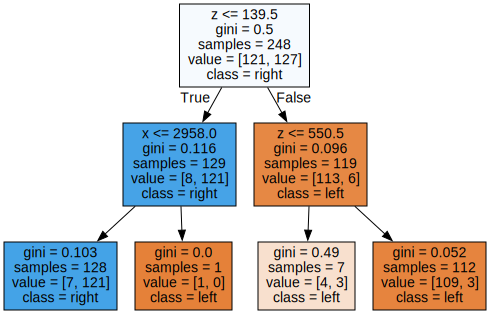

In [29]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("gyro_LR2.dot", encoding='UTF8') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

#이미지 사이즈 조정
#!pip install pydotplus

# import pydotplus

# pydot_graph = pydotplus.graph_from_dot_data(dot_graph)
# pydot_graph.set_size('"10,50!"')
# pydot_graph.write_png('resized_tree.png')
# gvz_graph = graphviz.Source(pydot_graph.to_string())
# gvz_graph

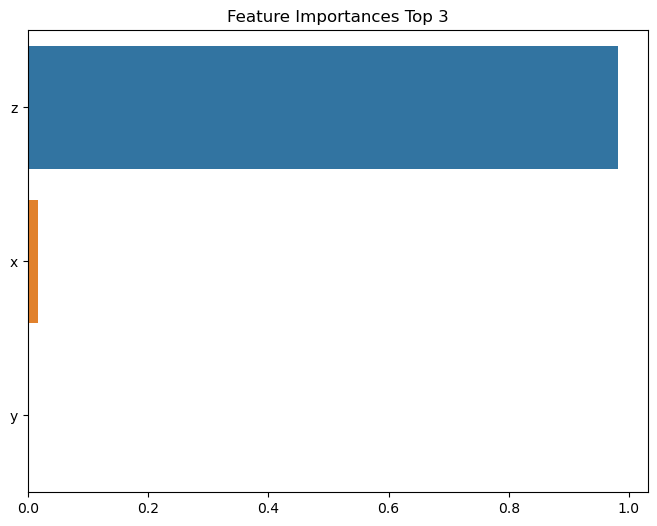

In [34]:
import seaborn as sns

feature_importance_values = best_df_clf.feature_importances_
# Top 중요도로 정렬하고, 쉽게 시각화하기 위해 Series 변환
feature_importances = pd.Series(feature_importance_values, index=X_train.columns)
# 중요도값 순으로 Series를 정렬
feature_top20 = feature_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=[8, 6])
plt.title('Feature Importances Top 3')
sns.barplot(x=feature_top20, y=feature_top20.index)
plt.show()